In [2]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

In [23]:
# Declare an augmentation pipeline
transform = A.Compose([
    #A.Resize(height = 512, width = 512),
    #A.RandomResizedCrop(p=1, height= 320 ,width= 320, scale=(0.65, 0.85),ratio=(0.90, 1.10)),
    A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(1,1), contrast_limit=(1.0, 1.0), brightness_by_max=False),
    #A.SafeRotate(always_apply=True, p=0.5, limit=(-10, 10), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    #A.HorizontalFlip(always_apply=False, p=0.5),
    #A.CenterCrop(always_apply=True, p=1, height=256, width=256)
])
transform_o = A.Compose([
    A.Resize(height = 720, width = 1280)
])

In [24]:
def draw_bounding_boxes(image_path, bbox_data, figsize=(12, 8)):
    # Load the image
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Open and read the bounding box data
    with open(bbox_data, 'r') as file:
        lines = file.readlines()

    # Process each bounding box
    for line in lines:
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())

        # Convert from relative to absolute coordinates
        x_center, y_center, bbox_width, bbox_height = (
            x_center * width, y_center * height, bbox_width * width, bbox_height * height
        )

        # Calculate coordinates of the top left corner
        x_top_left = int(x_center - bbox_width / 2)
        y_top_left = int(y_center - bbox_height / 2)

        # Draw the bounding box
        cv2.rectangle(image, (x_top_left, y_top_left), (x_top_left + int(bbox_width), y_top_left + int(bbox_height)), (255, 0, 0), 2)  # Blue color in BGR format, 2px thickness

    # Convert color from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    ax1.imshow(transform_o(image=image)['image'])
    ax1.axis('off')  # 첫 번째 서브플롯의 축 제거
    
    # Display the image with bounding boxes
    ax2.imshow(transform(image=image)['image'])
    ax2.axis('off')  # 첫 번째 서브플롯의 축 제거
    plt.show()


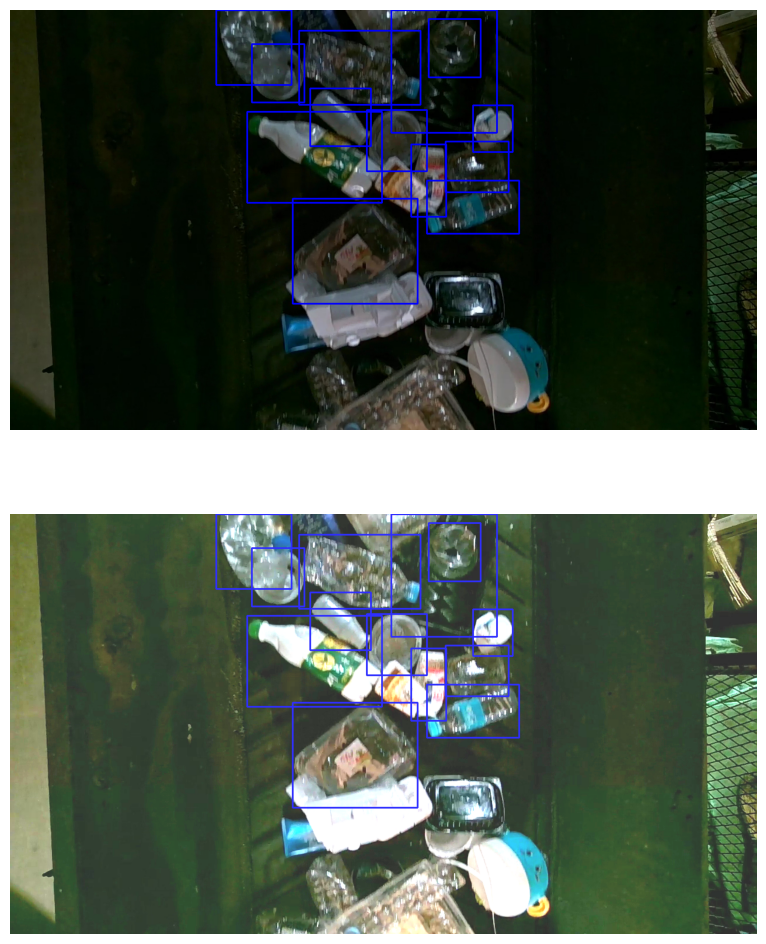

In [25]:
# Replace with your image and annotation file paths
image_path = '../wim_data/train/images/2023-04-24_45.mp4#t=280.jpg'
bbox_data = '../wim_data/train/labels/2023-04-24_45.mp4#t=280.txt'

draw_bounding_boxes(image_path, bbox_data, figsize=(12, 8))

In [63]:
save_path = './data/augmented/tylenol/'

k = 20
for img in disaster_dataset:
    im_bgr = cv2.imread(img)
    img_t = im_bgr[:, :, ::-1]
    for j in range(0,k):
        trans_img = transform(image=img_t)['image']
        img_array = Image.fromarray(trans_img.astype(np.uint8))
        img_array.save(os.path.join(save_path, f"{img[-8:-4]}_{j}.jpg"))


In [40]:
dir_path = "../Data/disaster/train/origin_images"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)
print(len(img_names))

1655


In [41]:
disaster_img = pd.DataFrame(img_names, columns=['image_id'])
disaster_img['dir'] = disaster_img['image_id'].apply(lambda x: os.path.dirname(x))
disaster_img['image_id'] = disaster_img['image_id'].apply(lambda x: os.path.basename(x))

disaster_img

,image_id,dir
0,1b24087aa0f9867b.jpg,../Data/disaster/train/origin_images/open_imag...
1,2b3651e8ba31ee65.jpg,../Data/disaster/train/origin_images/open_imag...
2,ecfe8082bc0a55ca.jpg,../Data/disaster/train/origin_images/open_imag...
3,eaa910f252495a1c.jpg,../Data/disaster/train/origin_images/open_imag...
4,17dba0da31436843.jpg,../Data/disaster/train/origin_images/open_imag...
...,...,...
1650,122156386.jpg,../Data/disaster/train/origin_images/flickr30k...
1651,4130537606.jpg,../Data/disaster/train/origin_images/flickr30k...
1652,4922742734.jpg,../Data/disaster/train/origin_images/flickr30k...
1653,3445296377.jpg,../Data/disaster/train/origin_images/flickr30k...


In [8]:
disaster_img.loc[0]['image_id']

'1b24087aa0f9867b.jpg'

In [25]:
real_img = disaster_img.loc[0]['dir'] +'/'+ disaster_img.loc[0]['image_id']
real_img

'../Data/disaster_images/open_image_disaster/1b24087aa0f9867b.jpg'

In [22]:
disaster_img.dir.iloc[0]

'../Data/disaster_images/open_image_disaster'

#### Randomly augmented images save

In [36]:
save_path = '../Data/disaster/augmented/'

k = 4
for i in range(len(disaster_img)):
    image_id = disaster_img.loc[i]['image_id']
    real_img = disaster_img.loc[i]['dir']  +'/'+ image_id
    im_bgr = cv2.imread(real_img)
    img = im_bgr[:, :, ::-1]
    
    ## origin
    trans_img = transform_o(image=img)['image']
    img_array = Image.fromarray(trans_img.astype(np.uint8))
    img_array.save(os.path.join(save_path, f"{image_id[:-4]}_00.jpg"))
    
    for j in range(1,k):
        trans_img = transform(image=img)['image']
        img_array = Image.fromarray(trans_img.astype(np.uint8))
        img_array.save(os.path.join(save_path, f"{image_id[:-4]}_0{j}.jpg"))


#### saparately augmented images save

In [19]:
transform = A.Compose([
    A.Resize(height = 512, width = 512),
    #A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(0.00, 0.00), contrast_limit=(0.2, 0.2), brightness_by_max=False),
    #A.SafeRotate(always_apply=True, p=1.0, limit=(-20, 20), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    #A.HorizontalFlip(always_apply=True, p=1.0),
    #A.CenterCrop(always_apply=True, p=1.0, height=256, width=256)
    #    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0)
    #A.pytorch.transforms.ToTensorV2()
])

In [49]:
main_path = '../Data/disaster/train/augmented/'
aug = 'CenterCrop'

save_path = main_path + aug
if not os.path.exists(save_path):
    os.makedirs(save_path)


for i in range(len(disaster_img)):
    image_id = disaster_img.loc[i]['image_id']
    real_img = disaster_img.loc[i]['dir']  +'/'+ image_id
    im_bgr = cv2.imread(real_img)
    try:
        img = im_bgr[:, :, ::-1]
    except:
        img = im_bgr
        print(disaster_img.loc[i]['image_id'])

    trans_img = transform(image=img)['image']
    img_array = Image.fromarray(trans_img.astype(np.uint8))
    img_array.save(os.path.join(save_path, f"{image_id[:-4]}_{aug}.jpg"))
    

libpng warning: iCCP: known incorrect sRGB profile


In [20]:
real_img = '1.jpg'
im_bgr = cv2.imread(real_img)
img = im_bgr[:, :, ::-1]
trans_img = transform(image=img)['image']
img_array = Image.fromarray(trans_img.astype(np.uint8))
img_array.save(os.path.join('./', f"{real_img}_01.jpg"))

In [50]:
dir_path =  '../Data/disaster/train/augmented'

augmented = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        augmented.append(folder+'/'+img)
print(len(augmented))

6620
